## National Childcare Costs and Female Employment Rate 2018

#### Introduction

For this project I looked at the Department of Labor's **National Database of Childcare Prices.** The data included a wide range of data about employment rates across genders for both non-parents and parents with children of specific ages, as well as childcare costs (both in-home and center-based) further broken down by age of the child. The DOL's data assigned county codes for each entry, which I cross references with a master county code list to get the county and state name for each entry to better contextualize the data.  

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("rocket")
sns.set_palette("rocket")

In [49]:
#read the csv files into dataframes
childcare_costs = pd.read_csv('childcare_costs.csv')
counties = pd.read_csv('counties.csv')

#### First, let's view the dataframes to make sure they imported correctly. 

In [50]:
#view counties database
print(counties.head(4))

   county_fips_code     county_name state_name state_abbreviation
0              1001  Autauga County    Alabama                 AL
1              1003  Baldwin County    Alabama                 AL
2              1005  Barbour County    Alabama                 AL
3              1007     Bibb County    Alabama                 AL


In [51]:
#view childcare costs database
print(childcare_costs.head(5))

   county_fips_code  study_year  unr_16  funr_16  munr_16  unr_20to64  \
0              1001        2008    5.42     4.41     6.32         4.6   
1              1001        2009    5.93     5.72     6.11         4.8   
2              1001        2010    6.21     5.57     6.78         5.1   
3              1001        2011    7.55     8.13     7.03         6.2   
4              1001        2012    8.60     8.88     8.29         6.7   

   funr_20to64  munr_20to64  flfpr_20to64  flfpr_20to64_under6  ...  memp_p  \
0          3.5          5.6          68.9                 66.9  ...   21.55   
1          4.6          5.0          70.8                 63.7  ...   21.96   
2          4.6          5.6          71.3                 67.0  ...   21.28   
3          6.3          6.1          70.2                 66.5  ...   22.80   
4          6.4          7.0          70.6                 67.1  ...   22.88   

   femp_p   mcsa  mfccsa  mc_infant  mc_toddler  mc_preschool  mfcc_infant  \
0    4.0

#### Now, to clean up the data I narrowed down the columns I wanted to look at. All the data was interesting to me but I decided to eliminate information about specific fields of work, race data, and information about the employment rates of 16-20 year olds. 

In [52]:
#drop unecessary columns
childcare_costs.drop(['pr_p', 'unr_16', 'funr_16', 'munr_16', 'emp_n', 'memp_n', 'femp_n', 'emp_sales', 'memp_sales', 'femp_sales', 'femp_m', 'emp_p', 'emp_service', 'memp_p', 'memp_service', 'femp_service', 'femp_p', 'one_race', 'one_race_w', 'one_race_b', 'one_race_i', 'one_race_a', 'one_race_h', 'one_race_other', 'two_races', 'hispanic'], axis=1, inplace=True)

#### Although I plan to make a data dictionary, I wanted to rename the columns to something I could understand at a glance. I left some of them as they were but lengthened a few of the abbreviations in others. 

In [53]:
#rename confusing columns
new_names = {'unr_20to64':'unemployed_20to64', 'funr_20to64':'fem_unemployed_20to64', 'munr_20to64':'male_unemployed_20to64', 'flfpr_20to64':'fem_labor_participation', 'flfpr_20to64_under6':'fem_labor_participation_childunder6', 'flfpr_20to64_6to17':'fem_labor_participation_child6to17', 'flfpr_20to64_under6_6to17':'fem_labor_participation_childunder6and17', 'mlfpr_20to64':'male_labor_participation', 'pr_f':'povery_rate_families', 'mhi_2018':'median_household_income_2018', 'me_2018':'median_earn_2018', 'fme_2018':'female_median_earn_2018', 'mme_2018':'male_median_earn_2018', 'mcsa':'weekly_med_center_cost','mfccsa':'weekly_med_famcare_cost','mc_infant':'weekly_med_center_cost_infant','mc_toddler':'weekly_med_center_cost_toddler','mc_preschool':'weekly_med_center_cost_preschool','mfcc_infant':'weekly_med_famcare_infant','mfcc_toddler':'weekly_med_famcare_toddler','mfcc_preschool':'weekly_med_famcare_preschool'}
childcare_costs.rename(columns=new_names, inplace=True)
print(childcare_costs.head(5))

   county_fips_code  study_year  unemployed_20to64  fem_unemployed_20to64  \
0              1001        2008                4.6                    3.5   
1              1001        2009                4.8                    4.6   
2              1001        2010                5.1                    4.6   
3              1001        2011                6.2                    6.3   
4              1001        2012                6.7                    6.4   

   male_unemployed_20to64  fem_labor_participation  \
0                     5.6                     68.9   
1                     5.0                     70.8   
2                     5.6                     71.3   
3                     6.1                     70.2   
4                     7.0                     70.6   

   fem_labor_participation_childunder6  fem_labor_participation_child6to17  \
0                                 66.9                               79.59   
1                                 63.7                  

#### Next, I merged the two dataframes, joining them on the county fips code column. This gave the data more context by allowing me to see what county and state the values are assigned to. 

In [54]:
#merge dataframes, joining on the county_fips_code column
childcare_merged = pd.merge(counties, childcare_costs)
print(childcare_merged.head(5) [["county_fips_code", "county_name", "study_year", "unemployed_20to64"]])

   county_fips_code     county_name  study_year  unemployed_20to64
0              1001  Autauga County        2008                4.6
1              1001  Autauga County        2009                4.8
2              1001  Autauga County        2010                5.1
3              1001  Autauga County        2011                6.2
4              1001  Autauga County        2012                6.7


#### The data encompasses about a decade's worth of information for each county. For the purposes of my project, I wanted to look only at the most recent year available, which was 2018. 

In [55]:
#filter dataframe to include only the most recent year
cc_merged_2018=childcare_merged.query("study_year == 2018")
print(cc_merged_2018.head(5) [["county_name", "study_year", "unemployed_20to64"]])

       county_name  study_year  unemployed_20to64
10  Autauga County        2018                3.9
21  Baldwin County        2018                4.1
32  Barbour County        2018                9.6
43     Bibb County        2018                7.2
54   Blount County        2018                3.7


#### I started exploring data by looking at the highest and lowest values in fields that interested me. I wanted to see how female employment rate was impacted by the cost of childcare, particularly when it comes to women with children who are under 6 years old and not likely to be eligible for public school programs yet. First, I calculated the counties with the highest median childcare costs, for both childcare centers and in-home care (called family care in this dataset.) 

In [56]:
#find the top 5 counties with the highest childcare center costs
cc_merged_2018 = cc_merged_2018.sort_values('weekly_med_center_cost', ascending=False)
print(cc_merged_2018.head(5)[["county_name", "state_name", "weekly_med_center_cost"]])

            county_name state_name  weekly_med_center_cost
34533      Teton County    Wyoming                  375.40
32074   Alexandria city   Virginia                  320.00
20590   Rockland County   New York                  313.96
20436     Nassau County   New York                  311.81
31095  Arlington County   Virginia                  310.00


In [57]:
#find the top 5 counties with the highest family/home-based care costs
cc_merged_2018 = cc_merged_2018.sort_values('weekly_med_famcare_cost', ascending=False)
print(cc_merged_2018.head(5)[["county_name", "state_name", "weekly_med_famcare_cost"]])

                county_name  state_name  weekly_med_famcare_cost
2462   San Francisco County  California                   289.62
20590       Rockland County    New York                   271.39
31095      Arlington County    Virginia                   270.00
20436         Nassau County    New York                   269.18
2275           Marin County  California                   266.53


#### Next I wanted to look at the highest and lowest employment rates for women with children under the age of 6.  

In [33]:
#find the top 5 counties with the highest employment rate for women with children under 6
cc_merged_2018 = cc_merged_2018.sort_values('fem_labor_participation_childunder6', ascending=False)
print(cc_merged_2018.head(5)[["county_name", "state_name", "fem_labor_participation_childunder6"]])

            county_name state_name  fem_labor_participation_childunder6
34467   Niobrara County    Wyoming                                100.0
32168      Emporia city   Virginia                                100.0
29555     Menard County      Texas                                100.0
19204    Wheeler County   Nebraska                                100.0
17961  Petroleum County    Montana                                100.0


#### When I listed out the top 5 counties I noticed that all of the results showed 100% participation in the workforce for women with children under the age of 6. This seemeed strange to me so I created a histogram to see if it fit the normal data distribution or if these values were outliers.  

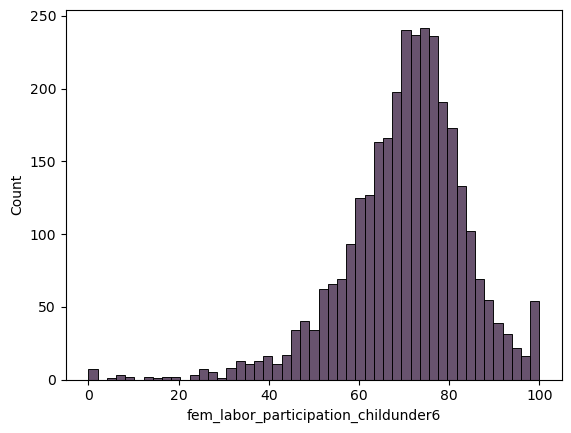

In [58]:
#create a histogram to determine if the 100% participation rate is an outlier or normal distribution
scatter_cc_costs = sns.histplot(data=cc_merged_2018, x="fem_labor_participation_childunder6")

#### Based on the histogram, there is a sharp jump at the 100 value, which indicates to me that this is not part of the normal distribution. I decided to remove the counties with 100% participation and create a graph showing the top 20 counties for participation in the workforce for women with children under the age of 6. I also see a small bump at 0 so I'm going to dive into that data first just to see what that might look like. 

In [59]:
#find the top 5 counties with the lowest employment rate for women with children under 6
cc_merged_2018 = cc_merged_2018.sort_values('fem_labor_participation_childunder6', ascending=True)
print(cc_merged_2018.head(5)[["county_name", "state_name", "fem_labor_participation_childunder6"]]) 

            county_name  state_name  fem_labor_participation_childunder6
19820    De Baca County  New Mexico                                  0.0
4805      Echols County     Georgia                                  0.0
19270  Esmeralda County      Nevada                                  0.0
29236       King County       Texas                                  0.0
30721      Piute County        Utah                                  0.0


#### These areas all seemed isolated so I surmised that there may just have been a very small group of women to survey. I then added in the total population for the counties to see if that would give me more insight. 

In [60]:
#find the top 5 counties with the lowest employment rate for women with children under 6 including total population
cc_merged_2018 = cc_merged_2018.sort_values('fem_labor_participation_childunder6', ascending=True)
print(cc_merged_2018.head(5)[["county_name", "state_name", "fem_labor_participation_childunder6", "total_pop"]]) 

            county_name  state_name  fem_labor_participation_childunder6  \
19820    De Baca County  New Mexico                                  0.0   
4805      Echols County     Georgia                                  0.0   
19270  Esmeralda County      Nevada                                  0.0   
29236       King County       Texas                                  0.0   
30721      Piute County        Utah                                  0.0   

       total_pop  
19820       2060  
4805        3994  
19270        981  
29236        228  
30721       1904  


#### The populations are small in a couple of these examples (especially Loving Co., Texas with a population of 102) but it doesn't entirely explain the 0% in Echols Co., Georgia, or even De Baca Co., New Mexico. I decided to look at the same information for the top 5 counties with 100% participation rates. 

In [61]:
#find the top 5 counties with the highest employment rate for women with children under 6
cc_merged_2018 = cc_merged_2018.sort_values('fem_labor_participation_childunder6', ascending=False)
print(cc_merged_2018.head(5)[["county_name", "state_name", "fem_labor_participation_childunder6", "total_pop"]])

                county_name state_name  fem_labor_participation_childunder6  \
29654         Motley County      Texas                                100.0   
32168          Emporia city   Virginia                                100.0   
18247         Blaine County   Nebraska                                100.0   
30193        Terrell County      Texas                                100.0   
17785  Golden Valley County    Montana                                100.0   

       total_pop  
29654       1156  
32168       5381  
18247        480  
30193        862  
17785        724  


#### Again, they are on the smaller side but I don't think any of these population numbers can explain such outliers on our graph. I moved forward with removing the 0 and 100% results from the data and then compared the top 20 counties for female labor participation amongst women with children under the age of 6. 

In [62]:
# drop all rows that contain a value of 100 in the fem_labor_participation_childunder6 column
cc_merged_2018 = cc_merged_2018.drop(cc_merged_2018[cc_merged_2018['fem_labor_participation_childunder6'] == 100.00].index)
print(cc_merged_2018.head(5)[["county_name", "state_name", "fem_labor_participation_childunder6", "total_pop"]])

             county_name   state_name  fem_labor_participation_childunder6  \
19798      Colfax County   New Mexico                                 99.4   
9733   Winneshiek County         Iowa                                 98.6   
16102     Sharkey County  Mississippi                                 98.5   
7401       Putnam County     Illinois                                 98.4   
835       Haines Borough       Alaska                                 98.3   

       total_pop  
19798      12353  
9733       20401  
16102       4511  
7401        5746  
835         2518  


In [63]:
# drop all rows that contain a value of 0 in the fem_labor_participation_childunder6 column
cc_merged_2018 = cc_merged_2018.drop(cc_merged_2018[cc_merged_2018['fem_labor_participation_childunder6'] == 0.00].index)
cc_merged_2018 = cc_merged_2018.sort_values('fem_labor_participation_childunder6', ascending=True)
print(cc_merged_2018.head(5)[["county_name", "state_name", "fem_labor_participation_childunder6", "total_pop"]])

           county_name      state_name  fem_labor_participation_childunder6  \
21316      Hyde County  North Carolina                                  1.1   
2792   Cheyenne County        Colorado                                  5.9   
19952      Mora County      New Mexico                                  6.3   
29016  Hudspeth County           Texas                                  7.4   
24407   Gilliam County          Oregon                                  7.7   

       total_pop  
21316       5393  
2792        2039  
19952       4563  
29016       4098  
24407       1907  


#### Next, I created a bar char with the top 20 counties for femal labor particpation with children under the age of 6. I wasn't happy with the way this graph looked so I played around with rotating the angle of the x axis labels, and limiting the y scale to just percentages between 95 and 100 since there wasn't much variation on this graph. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Colfax County'),
  Text(1, 0, 'Winneshiek County'),
  Text(2, 0, 'Sharkey County'),
  Text(3, 0, 'Putnam County'),
  Text(4, 0, 'Haines Borough'),
  Text(5, 0, 'Concho County'),
  Text(6, 0, 'Brown County'),
  Text(7, 0, 'Wayne County'),
  Text(8, 0, 'Calhoun County'),
  Text(9, 0, 'Norton County'),
  Text(10, 0, 'Wilbarger County'),
  Text(11, 0, 'Richardson County'),
  Text(12, 0, 'Howard County'),
  Text(13, 0, 'Richmond County'),
  Text(14, 0, 'Granite County'),
  Text(15, 0, 'Gilmer County'),
  Text(16, 0, 'Woodson County'),
  Text(17, 0, 'Faulk County'),
  Text(18, 0, 'Shackelford County'),
  Text(19, 0, 'Turner County')])

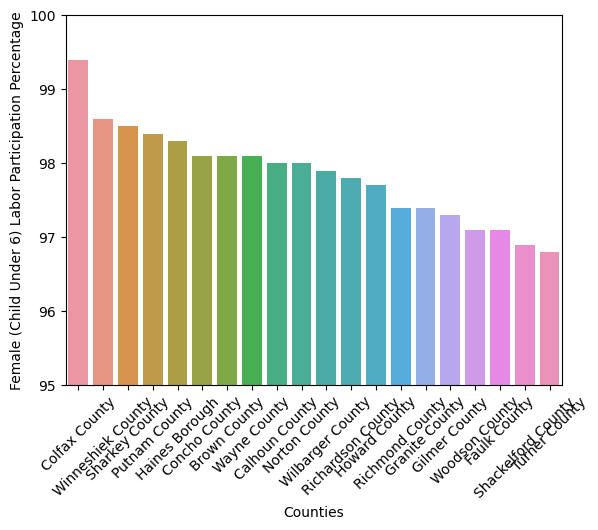

In [40]:
#create a bar chart of the top 20 counties for female labor participation with children under 6
sns.barplot(cc_merged_2018.sort_values('fem_labor_participation_childunder6', ascending=False).head(20), x="county_name", y="fem_labor_participation_childunder6")
# Set labels and limits
plt.xlabel('Counties')
plt.ylabel('Female (Child Under 6) Labor Participation Percentage')
plt.ylim(95, 100)
#rotate the x axis labels to make them more readable
plt.xticks(rotation=45)

#### I had hoped this graph would help me see if there were any commonalities between the locations that had a high female employment rate for young mothers. Unfortunately, without the state column I couldn't tell at a glance whether there was a pattern. I appended the state names to the county labels and flipped the x and y axis on my graph to make the data more digestible at a glance. 

In [64]:
#apend the state names to the county labels
cc_merged_2018["county_state"]=cc_merged_2018['county_name'] + " , " + cc_merged_2018['state_abbreviation']

(95.0, 100.0)

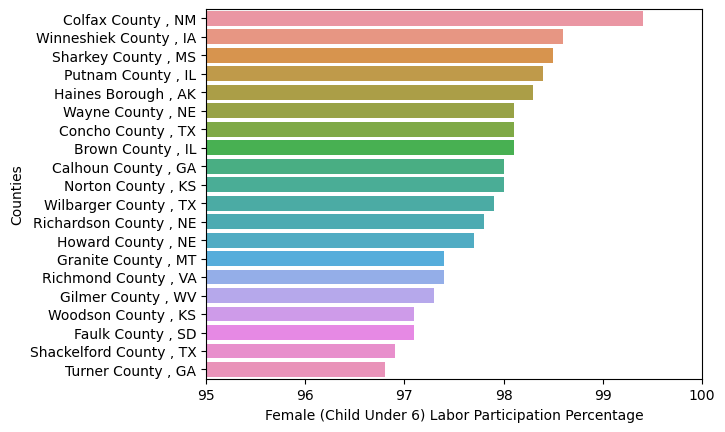

In [73]:
#create a NEW and IMPROVED bar chart of the top 20 counties for female labor participation with children under 6
sns.barplot(cc_merged_2018.sort_values('fem_labor_participation_childunder6', ascending=False).head(20), x="fem_labor_participation_childunder6", y="county_state")
# Set labels and limits
plt.ylabel('Counties')
plt.xlabel('Female (Child Under 6) Labor Participation Percentage')
plt.xlim(95, 100)

#### This still didn't give me what I wanted at a glance so I decided to color code the bars to the state abbreviation column. I also had to eliminate the additional stacking that seaborn does when you add hue so that the bars were still visible. I did this by using dodge=false. 

(95.0, 100.0)

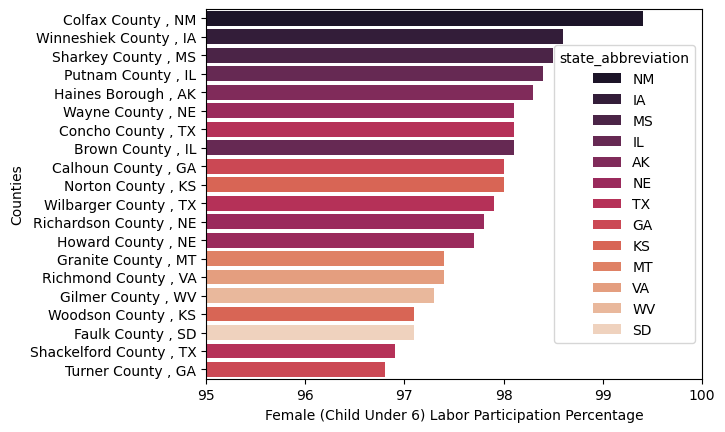

In [71]:
#add color values tied to the state column
sns.barplot(cc_merged_2018.sort_values('fem_labor_participation_childunder6', ascending=False).head(20), x="fem_labor_participation_childunder6", y="county_state", hue="state_abbreviation", palette="rocket", dodge=False)
# Set labels and limits
plt.ylabel('Counties')
plt.xlabel('Female (Child Under 6) Labor Participation Percentage')
plt.xlim(95, 100)

#### The bar chart now color codes the data by state but there are not enough strong correlations for me to draw any conclusions from. 

#### Next, I wanted to compare this data to the counties with the most affordable childcare centers available. 

In [74]:
#find the top 20 counties with the lowest childcare center costs
cc_merged_2018 = cc_merged_2018.sort_values('weekly_med_center_cost', ascending=True)
print(cc_merged_2018.head(20)[["county_name", "state_name", "weekly_med_center_cost"]])

               county_name    state_name  weekly_med_center_cost
17026        Mercer County      Missouri                   18.98
16663        DeKalb County      Missouri                   33.37
6026       Honolulu County        Hawaii                   34.62
9854         Butler County        Kansas                   43.30
10437         Miami County        Kansas                   43.30
10338   Leavenworth County        Kansas                   43.30
10921     Wyandotte County        Kansas                   43.30
10723      Sedgwick County        Kansas                   43.30
10657         Riley County        Kansas                   43.30
10591  Pottawatomie County        Kansas                   44.20
22130        Kidder County  North Dakota                   45.02
21921        Benson County  North Dakota                   45.41
22053        Emmons County  North Dakota                   45.41
22350      Sheridan County  North Dakota                   45.41
22361         Sioux Count

#### Looking at the data as it appears here, there seems to be no correlation between the counties with the lowest childcare center costs and the counties with the higheset employment rates for young mothers. However, some of these numbers look suspicious to me. The county with the lowest cost childcare center is about half the cost of the second-lowest. Additionally, there seem to be several counties within the same state that report identical numbers. This could be due to competitive pricing within the same geographic area, or it could be a case of lazy or faulty reporting from these states. Just for fun, I wanted to throw this information into a histograph like I did with female employment rates. 

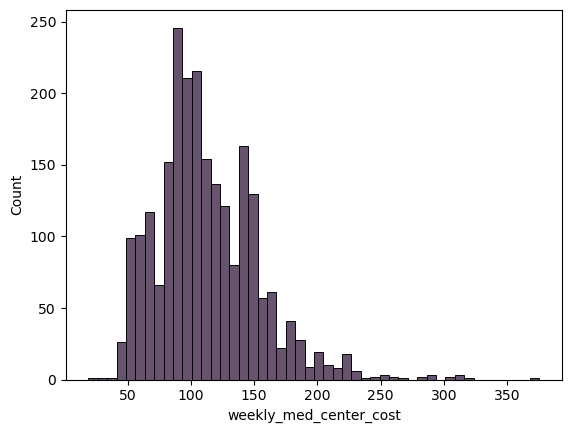

In [75]:
#create a histogram for median weekly chilcare center costs
scatter_cc_costs = sns.histplot(data=cc_merged_2018, x="weekly_med_center_cost")

#### This data distribution looked fairly normal to me, although I did notice a far outlier on the higher end of childcare costs. I decided to dig in and clean that up a bit. I ran this data earlier in the process, but I limited the results to 5 rows. 

In [76]:
#find the top 20 counties with the lowest childcare center costs
cc_merged_2018 = cc_merged_2018.sort_values('weekly_med_center_cost', ascending=False)
print(cc_merged_2018.head(20)[["county_name", "state_name", "weekly_med_center_cost"]])

              county_name  state_name  weekly_med_center_cost
34533        Teton County     Wyoming                  375.40
32074     Alexandria city    Virginia                  320.00
20590     Rockland County    New York                  313.96
20436       Nassau County    New York                  311.81
31095    Arlington County    Virginia                  310.00
20678      Suffolk County    New York                  307.32
20766  Westchester County    New York                  305.41
32190   Falls Church city    Virginia                  290.00
31337      Fairfax County    Virginia                  290.00
32179        Fairfax city    Virginia                  290.00
20546       Putnam County    New York                  286.20
19534       Bergen County  New Jersey                  281.22
19666       Morris County  New Jersey                  266.50
32300  Manassas Park city    Virginia                  260.00
19622    Hunterdon County  New Jersey                  259.47
13286   

#### This solves the mystery of our "outlier" for me. Jackson Hole, Wyoming is in Teton County. This area has an abnormally high cost of living. It attracts very wealthy individuals as a ski destination, and real estate there is extremely expensive due to the limited zoning for commercial and residential property due to the amount of federal land in and around Teton County. Coupling this with the fact that for many wealthy people this is a location in which to have a second home or vacation home, further driving up the cost of childcare (because regular enrollment cannot be counted on for guaranteed income for a facility like it could be in non-resort areas), I believe this number is probably accurate and not an accidental or mistaken outlier in the data. 